# **EDA_Analysis on Titanic Dataset**
# **By Amit Kharche**
### **Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1. What is the distribution of passenger ages?**](#section81)<br>
  - [**8.2. What is the survival rate overall?**](#section82)<br>
  - [**8.3. How does survival vary by passenger class (Pclass)?**](#section83)<br>
  - [**8.4. How does survival differ by gender?**](#section84)<br>
  - [**8.5. What is the fare distribution among passengers?**](#section85)<br>
  - [**8.6. How does survival vary across embarkation ports?**](#section86)<br>
  - [**8.7. What is the correlation between numerical features?**](#section87)<br>
  - [**8.8. How does age affect survival?**](#section88)<br>
  - [**8.9. What is the impact of family size on survival?**](#section89)<br>
  - [**8.10. What are the most common titles and their survival rates?**](#section810)<br>
  - [**8.11. What are the top 10 most frequent names (family)?**](#section811)<br>
  - [**8.12. How many passengers were alone vs. with family?**](#section812)<br>
  - [**8.13. What is the age distribution across passenger classes?**](#section813)<br>
  - [**8.14. Are there outliers in Fare with respect to class and survival?**](#section814)<br>
  - [**8.15. What is the survival rate across different age groups (bins)?**](#section815)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section9.1)<br>
  - **9.2** [**Actionable Insights***](#Section9.1)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- One of the most **popular disasters** in the history is the **sinking** of the RMS **Titanic**.

- RMS **Titanic** was a British passenger liner operated by the **White Star Line** that **sank** in the North Atlantic Ocean on 15 April 1912.

- The reason behind **sinking** of this beauty was because of **striking** to an **iceberg** while travelling from **Southampton** to **New York City**.

<center><img src="https://raw.githubusercontent.com/HirenRupchandani/Credit-Management-System/master/titanic_PNG1.png"></center>

- The popular event has **inspired** numerous **works of art**, the most prominient being the 1997 movie - Titanic.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- On **April 15, 1912** the **Titanic** **sank**, costing the lives of **1502 out of 2224** passengers and crew.

- Unfortunately, there **weren’t enough lifeboats** for everyone onboard, causing a **disproportionate** number of **deaths**.

- While there was some element of **luck** involved in surviving, it seems some **groups of people** were more likely to **survive** than others.

<center><img src="https://raw.githubusercontent.com/HirenRupchandani/Credit-Management-System/master/boat-sinking-2.gif"></center>


<a name = Section21></a>
### **Scenario**

* Let's say that after the accident, there is a need to implement **better safety regulations** for passenger liners.

* As part of the **data science team**, you have been tasked with **analyzing passenger data** from the RMS Titanic.

* You have been **provided with a dataset** containing detailed information about the **passengers** who were aboard the ship.

* The goal is to **analyze** and **explore** the **factors** that may have influenced a passenger’s **likelihood of survival**.

* Therefore, the primary objectives are to:

  * Conduct a **statistical analysis** to understand **which groups of people** were more likely to **survive**.

  * Perform an **Exploratory Data Analysis (EDA)** of the Titanic dataset using **visualizations** and **storytelling**.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                        # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---



- The dataset consists of the information about people boarding the famous RMS Titanic.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 891 | 12 | 58.9 KB |

| ID | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **PassengerId**   | Identity of the passenger                                    |
|02| **Survived**      | Whether the passenger survived or not                 |
|03| **Pclass**        | Class of the ticket holder                            |
|04| **Name**          | Name of the passenger                                 |
|05| **Sex**           | Sex of the passenger                                  |
|06| **Age**           | Age of the passenger                                  |
|07| **SibSp**     | Siblings and/or spouse travelling with passenger |
|08| **Parch**     | Parents and/or children travelling with passenger|
|09| **Ticket**        | Ticket number                                         |
|10| **Fare**          | Price of the ticket                                   |
|11| **Cabin**         | Cabin number                                          |
|12| **Embarked**     | Port of Embarkation                                   |

In [2]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_titanic_dataset_amit_kharche/titanic_train.csv')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Observations:**

> **Survived**:
- More than 50% did not survive the accident.

> **Pclass**:
- There are a lot **more 3rd class** passengers than **1st and 2nd class**.
- We can also see that there are **more 2nd class** passengers **than 1st class** passengers.

> **SibSp**:
- More than **50%** of passengers are **not travelling** with their **siblings** or a **spouse**.
- There are **some** passengers who are travelling with as **maximum** as **8 siblings and spouse**.

> **Parch**:
- More than **75%** passengers are not travelling with a **parent** or **children**
- But there are some passengers who have a **maximum** number of **6 children** and/or **parents** with them on the ship.
- We observe that a vast majority of passengers **are not travelling** with their family members.

> **Age**:
- The **average age** of passengers is around **29 years** while the **minimum** and **maximum** ages are **0.4 years** and **80 years** respectively.
- There is some **missing** data in the **Age** feature.

> **Fare**:
- The **average price** of ticket seems to be **£32.2**. **Minimum** price of the ticket is recorded as **£0** and **maximum** price recorded as high as **£512.32**.
- More than **50%** of the passengers have paid atleast **£14**
- More than **75%** passengers have paid atleast **£7** for their ticket whereas **less than 25%** have paid for **more than £31**.
- We have to replace the minimum value in the **Fare** feature with a reasonable value.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Observations:**

- The **data types** of all the features look appropriate.

- There are **missing** values present in the **Age**, **Cabin** and **Embarked** features.

- **Age** and **Cabin** have a significant amount of **missing values** which **requires** **further investigation**.


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset

- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [6]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 21.57it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


### **Observations:**

- There are **891** observations with **12** features. Most of the features have **categorical** data.

- Only **342** passengers out of **891** survived the accident.

- **Name**, **Ticket**, and **Cabin** features have high cardinality and are uniformly distributed.

- **PassengerId** is uniformly distributed

- A lot of **zeros** are present in **Fare**, **Sibsp** and **Parch** features.

- There are **no duplicate** rows in the dataset.

- We can observe that **8.1%** of data in cells is **missing**.

- **Fare** feature is highly skewed towards right.

- **Age** feature is faily symmetrical.

- We can observe that the **Age** feature has **177 missing values** and **Cabin** feature has **687 missing values**.

- **Embarked** feature has just **2 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

---
<a name = Section6></a>
# **6. Data Cleaning**
---

- We will perform **cleaning** operations on our data based on the observations made from the profiling report.

|Feature|Data Type|Missing Proportion|Solution|
|:--:|:--:|:--:|:--|
|Age|float64|19.9%|Replace with median.|
|Embarked|object|0.2%|Replace with mode.|
|Cabin|object|77.1%|Drop the feature.|

In [7]:
# Filling the missing values of Embarked feature with the mode of the feature.
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# Filling the missing values of Age feature with the median age.
data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Dropping the Cabin feature
data.drop(labels='Cabin', axis=1, inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- We have successfully **cleaned** our data.

<a id=section7></a>
---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

####  Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset.

In [8]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 10075.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a id=section81></a>
**8.1. What is the distribution of passenger ages?**

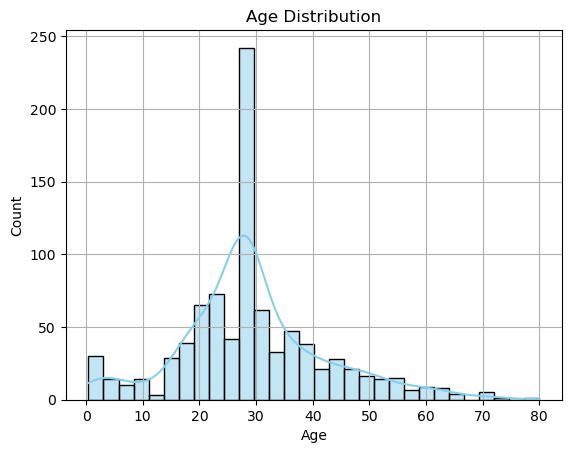

In [9]:
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Observation:
- The **age distribution** is **right-skewed**, with the majority of passengers aged between **20 and 40 years**.
- A **sharp peak** is observed around **28–30 years**, indicating a high concentration of passengers in that age bracket.
- Very **few passengers were older than 60**, and **children below 10** form a small proportion of the dataset.


<a id=section82></a>
**8.2. What is the survival rate overall?**

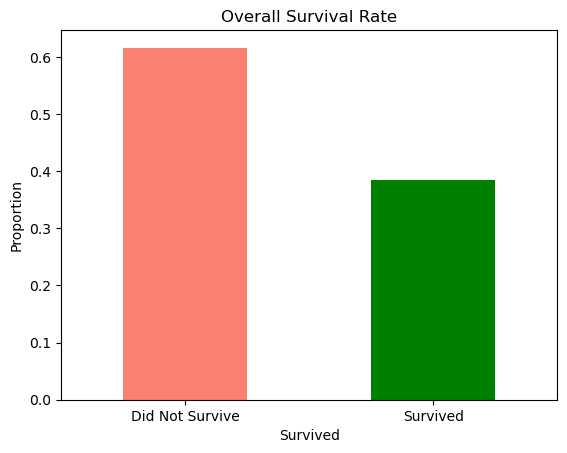

In [10]:
data['Survived'].value_counts(normalize=True).plot(kind='bar', color=['salmon', 'green'])
plt.title('Overall Survival Rate')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel('Proportion')
plt.show()

### Observation:

- The **overall survival rate** indicates that around **62% of passengers did not survive**, while only **38% survived** the tragedy.
- This shows a **significant class imbalance**, with **more deaths than survivors** in the dataset.
- The **low survival proportion** highlights the severity of the disaster and the limited availability of rescue resources.

<a id=section83></a>
**8.3. How does survival vary by passenger class (Pclass)?**

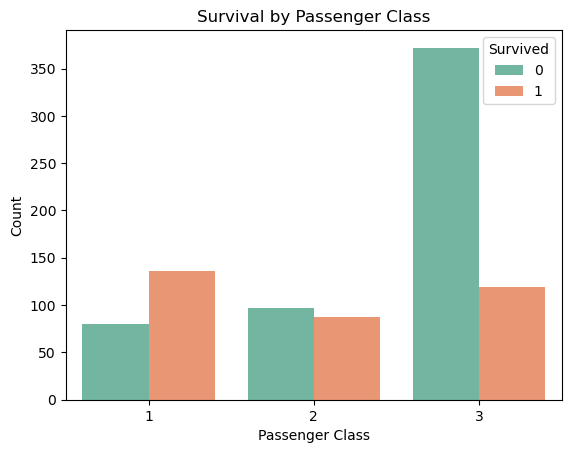

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

### Observation:
- **First-class passengers** had a **higher survival count** than those in second and third class, indicating **preferential rescue**.
- **Third-class passengers** experienced the **highest number of deaths**, revealing a strong link between **class and survival rate**.
- The disparity suggests that **socioeconomic status** significantly influenced **access to lifeboats and safety**.

<a id=section84></a>
**8.4. How does survival differ by gender?**

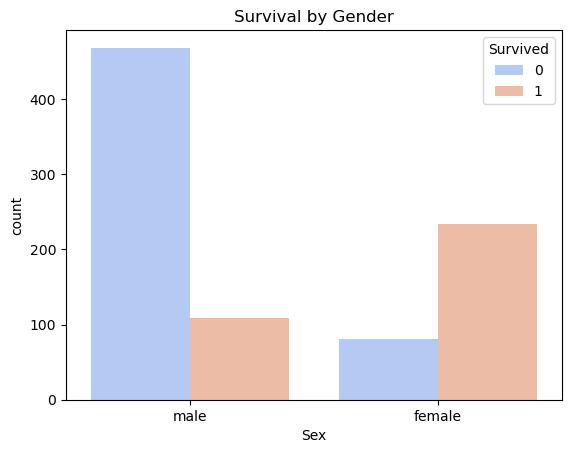

In [12]:
sns.countplot(x='Sex', hue='Survived', data=data, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()

### Observation:
- **Females had a significantly higher survival rate** compared to males, reflecting the "women and children first" evacuation protocol.
- The **majority of male passengers did not survive**, with their death count far exceeding their survival count.
- This gender-based disparity highlights **prioritized rescue efforts** and **unequal survival opportunities** during the disaster.

<a id=section85></a>
**8.5. What is the fare distribution among passengers?**

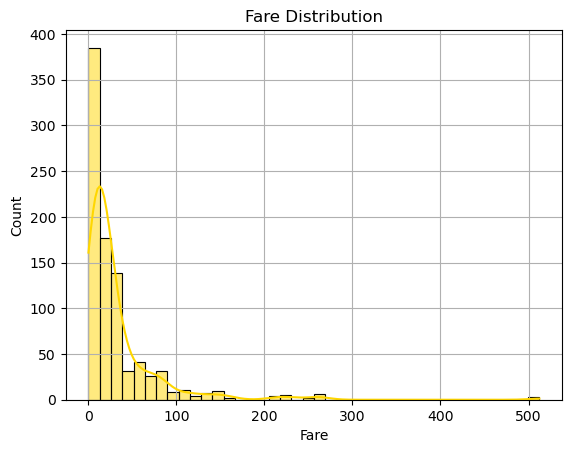

In [13]:
sns.histplot(data['Fare'], bins=40, kde=True, color='gold')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.grid(True)
plt.show()

### Observation:
- The **fare distribution** is highly **right-skewed**, with most passengers paying **less than $100** for their tickets.
- A **majority of fares** cluster below $50, indicating a large number of **economy-class passengers**.
- Only a **small number of passengers paid high fares** (above $200), representing the **wealthiest individuals** aboard.

<a id=section86></a>
**8.6. How does survival vary across embarkation ports?**

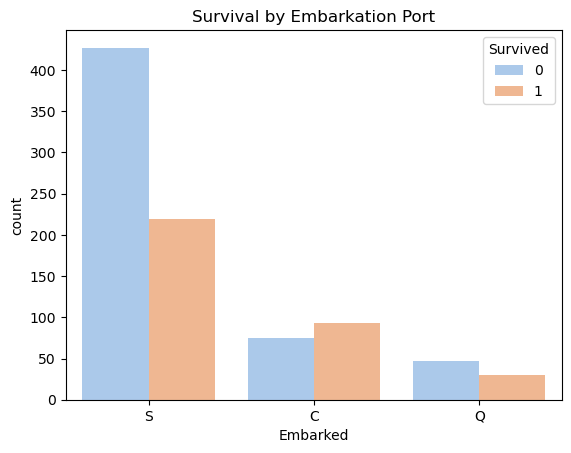

In [14]:
sns.countplot(x='Embarked', hue='Survived', data=data, palette='pastel')
plt.title('Survival by Embarkation Port')
plt.show()

### Observation:
- Passengers who **embarked from Cherbourg (C)** had the **highest survival rate**, with survivors outnumbering the deceased.
- Those from **Southampton (S)** made up the largest group but also had the **highest death count**, indicating lower survival probability.
- Embarkation from **Queenstown (Q)** showed the **lowest passenger count and survival**, suggesting limited representation and poor outcomes.

<a id=section87></a>
**8.7. What is the correlation between numerical features?**

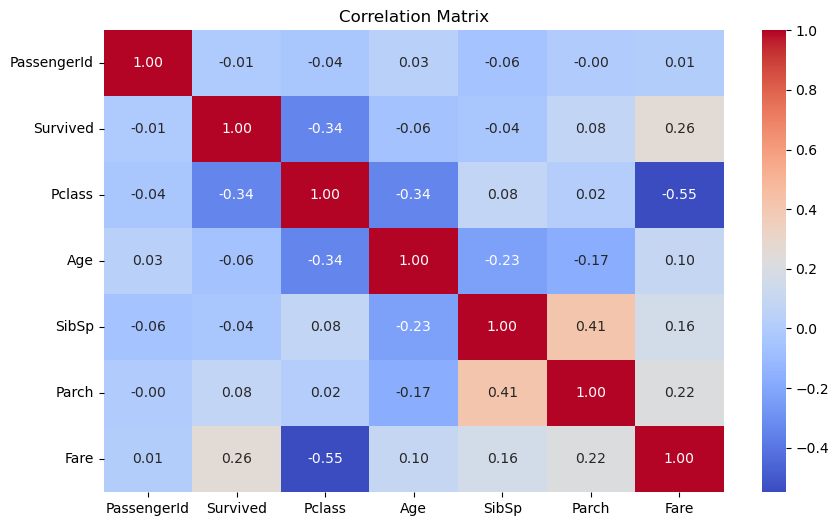

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Observation:
- **Survival is negatively correlated with Pclass (-0.34)**, suggesting that passengers in higher classes had better chances of survival.
- **Fare has a moderate positive correlation (0.26) with Survival**, indicating that those who paid more were more likely to survive.
- Other features like **Age, SibSp, and Parch** show weak correlations with Survival, implying limited direct influence.


<a id=section88></a>
**8.8. How does age affect survival?**

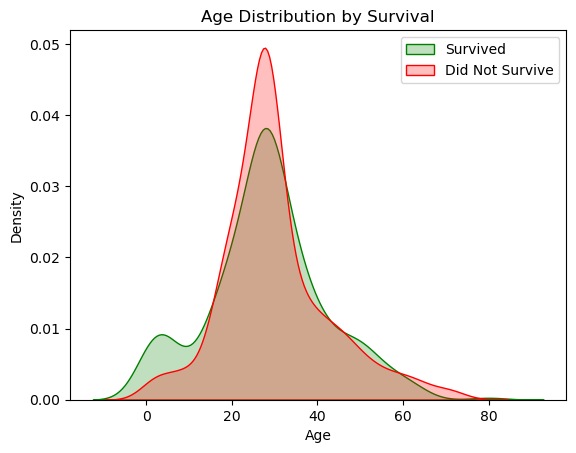

In [16]:
sns.kdeplot(data=data[data['Survived'] == 1]['Age'], fill=True, label='Survived', color='green')
sns.kdeplot(data=data[data['Survived'] == 0]['Age'], fill=True, label='Did Not Survive', color='red')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

### Observation:
- **Survivors and non-survivors** were mostly concentrated between the ages of **20 and 40**, with peak density around late 20s.
- **Children below 10** show a slightly **higher survival density**, indicating some prioritization during rescue.
- **Elderly passengers (60+)** had a **low survival rate**, reflecting increased vulnerability or reduced evacuation priority.

<a id=section89></a>
**8.9. What is the impact of family size on survival?**

In [19]:
#Cretae Familysize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


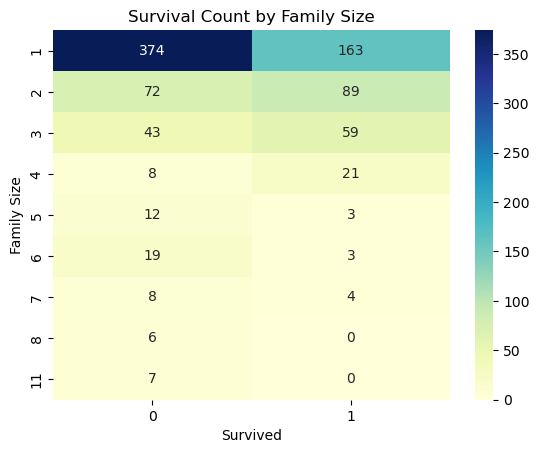

In [30]:
heatmap_data = pd.crosstab(data['FamilySize'], data['Survived'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Count by Family Size')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()

### Observation:
- Passengers with a **family size of 2 to 4** had **higher survival counts**, indicating strength in small groups during evacuation.
- Those who were **alone (family size = 1)** had the **highest death count**, reflecting increased vulnerability.
- **Larger families (size 5 or more)** show a **sharp drop in survival**, likely due to logistical challenges during escape.

<a id=section810></a>
**8.10. What are the most common titles and their survival rates?**

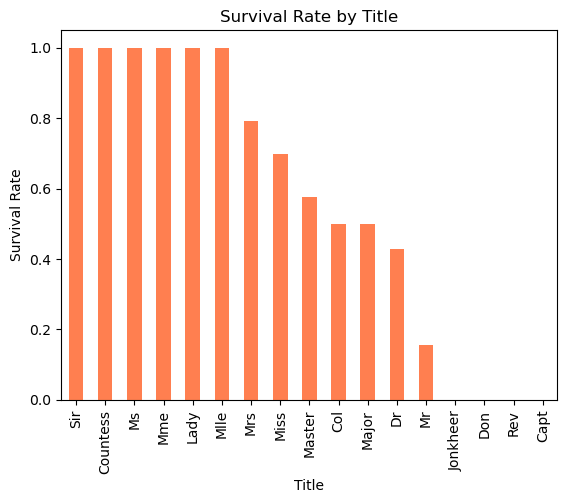

In [22]:
#Create the Title feature
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


title_survival = data.groupby('Title')['Survived'].mean().sort_values(ascending=False)
title_survival.plot(kind='bar', color='coral')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.show()

### Observation:

- Titles like **Sir, Countess, Lady, and Ms** had a **100% survival rate**, indicating **preferential treatment for nobility and women**.
- **Mr** had one of the **lowest survival rates**, reflecting the **high mortality among adult men**.
- Military and professional titles like **Col, Major, and Dr** had **moderate survival rates**, while **Rev, Capt, and Don** show **no survival**.


<a id=section811></a>
**8.11. What are the top 10 most frequent names (family)?**

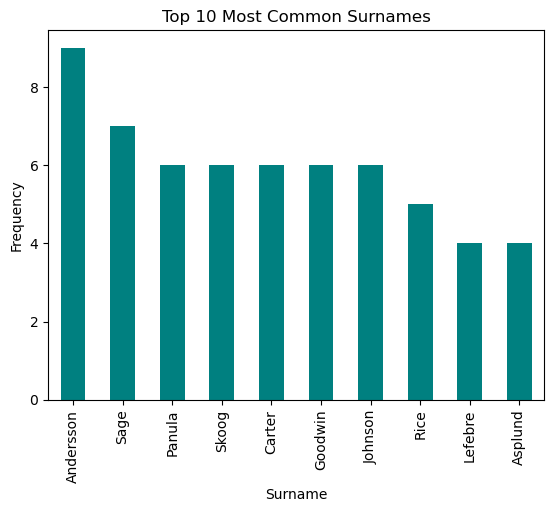

In [23]:
data['Surname'] = data['Name'].apply(lambda x: x.split(',')[0])
data['Surname'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Surnames')
plt.ylabel('Frequency')
plt.show()

### Observation:
- The surname **Andersson** appears most frequently, with **9 occurrences**, suggesting it belonged to a large family or group.
- Other common surnames like **Sage**, **Panula**, and **Skoog** also indicate the presence of **extended families** or **related individuals** on board.
- Analyzing frequent surnames can help in **identifying family clusters**, which is useful for studying **group survival patterns**.

<a id=section812></a>
**8.12. How many passengers were alone vs. with family?**

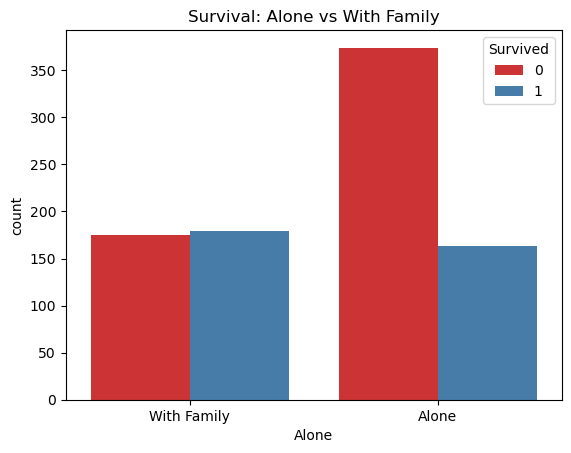

In [31]:
data['Alone'] = data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
sns.countplot(x='Alone', hue='Survived', data=data, palette='Set1')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.title('Survival: Alone vs With Family')
plt.show()

### Observation:

- Passengers who **traveled alone** had a **much higher death count** compared to those with family.
- Those **with family** had a **more balanced survival outcome**, indicating that companionship may have offered support during the crisis.
- The chart suggests that being **alone significantly reduced the likelihood of survival** on the Titanic.


<a id=section813></a>
**8.13. What is the age distribution across passenger classes?**

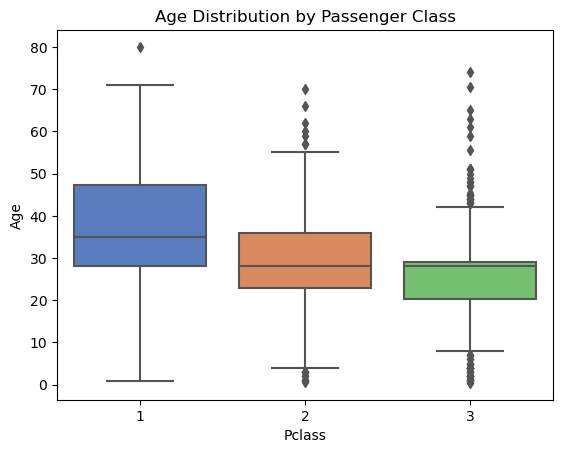

In [32]:
sns.boxplot(x='Pclass', y='Age', data=data, palette='muted')
plt.title('Age Distribution by Passenger Class')
plt.show()

### Observation
- **First-class passengers** had a **higher median age** and a **wider age range**, indicating older and more diverse age groups.
- **Third-class passengers** were generally **younger**, with the lowest median and more concentrated age distribution.
- The presence of **outliers in all classes** shows a mix of ages across social classes, but clear differences in central tendencies exist.

<a id=section814></a>
**8.14. Are there outliers in Fare with respect to class and survival?**

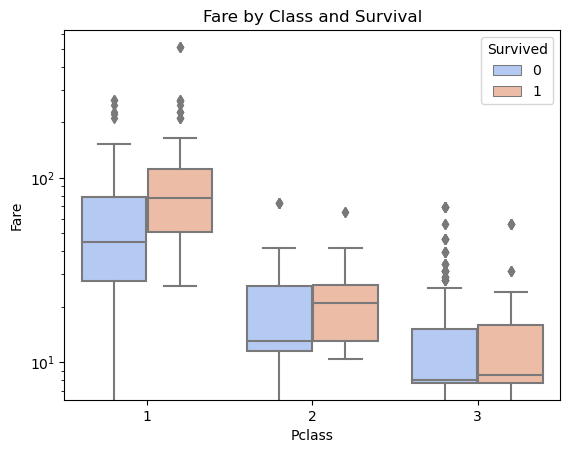

In [33]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Fare by Class and Survival')
plt.yscale('log')  # Fare has outliers
plt.show()

### Observation:
- **First-class passengers** paid the **highest fares**, and among them, **survivors tended to pay more** than non-survivors.
- Across all classes, **higher fares are associated with a greater likelihood of survival**, especially evident in **Pclass 1**.
- The **log scale** highlights the **fare disparity across classes**, with **third-class fares tightly clustered at the lower end** and many **outliers in higher classes**.

<a id=section815></a>
**8.15. What is the survival rate across different age groups (bins)?**

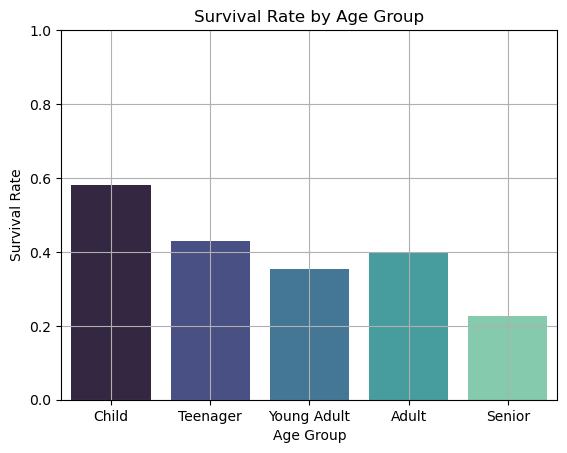

In [35]:
# Create age bins
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], 
                          labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Calculate survival rate by age group
agegroup_survival = data.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=agegroup_survival, palette='mako')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Observation:
- **Children had the highest survival rate** among all age groups, highlighting **prioritization during evacuation**.
- **Seniors faced the lowest survival rate**, likely due to **physical limitations and lower priority**.
- **Young Adults and Teenagers** had **moderate survival rates**, while **Adults showed slightly better chances** of surviving.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section9.1></a>
### **9.1 Conclusion**

1. The **overall survival rate was below 40%**, indicating a **high fatality level** during the Titanic disaster.
2. **Gender and class** played a critical role—**females and first-class passengers** had notably **higher survival rates**.
3. **Children had the highest survival rate**, reinforcing the "women and children first" evacuation principle.
4. Passengers who **traveled alone** faced **significantly lower survival chances** compared to those with families.
5. **Higher ticket fares and noble titles** correlated with **increased survival**, suggesting **preferential treatment** for wealth and status.
6. **Third-class passengers** and **elderly individuals** consistently experienced **lower survival**, showing systemic disadvantages in rescue efforts.

<a name = Section9.2></a>
### **9.2 Actionable Insights**
1. **Prioritize evacuation plans** to ensure **equal access** for all classes and demographics, reducing socio-economic survival bias.
2. **Implement structured family rescue protocols**, as those **with family support** had better survival outcomes than those alone.
3. Design **inclusive safety drills** and cabin allocations so that **younger and older age groups** receive tailored attention during emergencies.
4. **Monitor and balance ticket pricing vs. access to safety**, ensuring that **fare levels don't dictate survival probability**.
5. Use **titles or metadata segmentation** in modern datasets for **risk profiling**, but ensure they don't lead to biased rescue decisions.
6. **Enhance life-saving infrastructure** in third-class areas and integrate **age and family-aware evacuation strategies** for future maritime safety.